In [1]:
from pycirclize import Circos
import pandas as pd
import pandas as pd

# Read the TSV file
df = pd.read_csv('data/chord_data.tsv', sep='\t')

# Check the first few rows to ensure it's loaded correctly
print(df.head())

df = df.replace({'from': {'Acute myocardial infarction': 'AMI'}, 'to': {'Acute myocardial infarction': 'AMI'}})
df = df.replace({'from': {'Systemic Lupus Erythematosus': 'Systemic Lupus'}, 'to': {'Systemic Lupus Erythematosus': 'Systemic Lupus'}})


            from                    to  value
0  Endometrioses              Anorexia    223
1  Endometrioses      Anxiety Disorder    550
2  Endometrioses  Rheumatoid arthritis   1046
3  Endometrioses            Depression    757
4  Endometrioses          Hyperalgesia    220


In [2]:
matrix_df = df.pivot_table(index='from', columns='to', values='value', aggfunc='sum', fill_value=0)
print(matrix_df)


to                    AMI  Anorexia  Anxiety Disorder  Depression  \
from                                                                
AMI                     0       184               414         590   
Anorexia                0         0               241         298   
Anxiety Disorder        0         0                 0        1134   
Depression              0         0                 0           0   
Endometrioses         531       223               550         757   
Hyperalgesia            0         0                 0           0   
Multiple Sclerosis      0         0                 0           0   
NAFLD                   0         0                 0           0   
Neuropathy              0         0                 0           0   
Rheumatoid arthritis    0         0                 0           0   
Sjogren's Syndrome      0         0                 0           0   

to                    Hyperalgesia  Multiple Sclerosis  NAFLD  Neuropathy  \
from                     

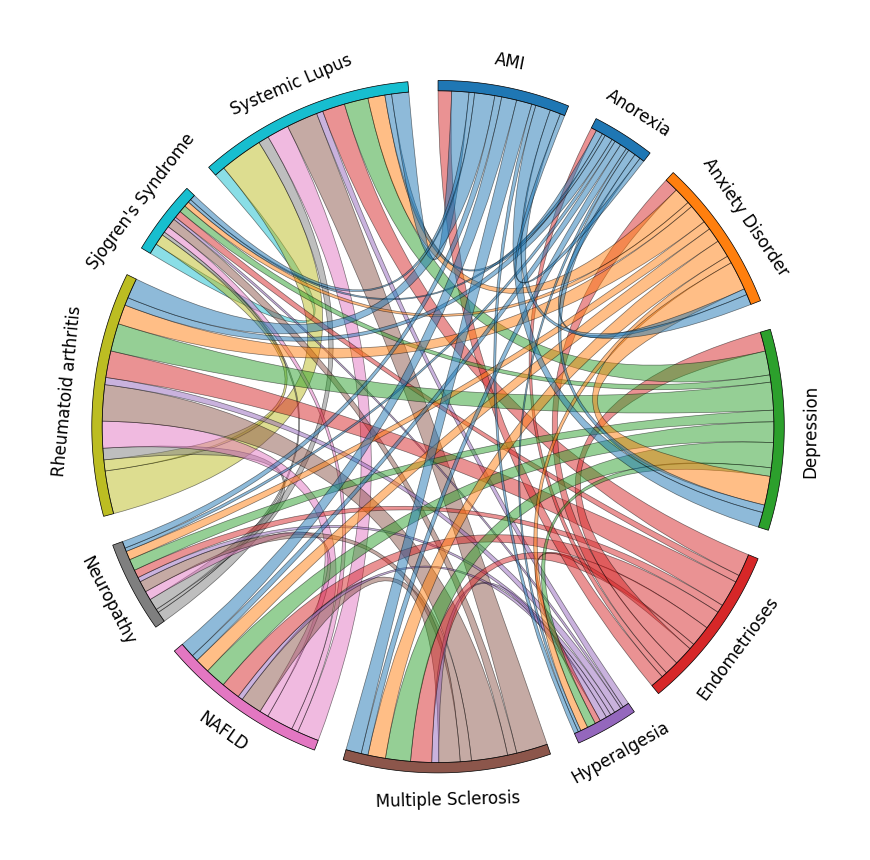

In [3]:
circos = Circos.chord_diagram(
    matrix_df,
    space=5,
    cmap="tab10",
    label_kws=dict(size=12),
    link_kws=dict(ec="black", lw=0.5, direction=0),
)
fig = circos.plotfig()

circos.savefig("images/circos1.png")


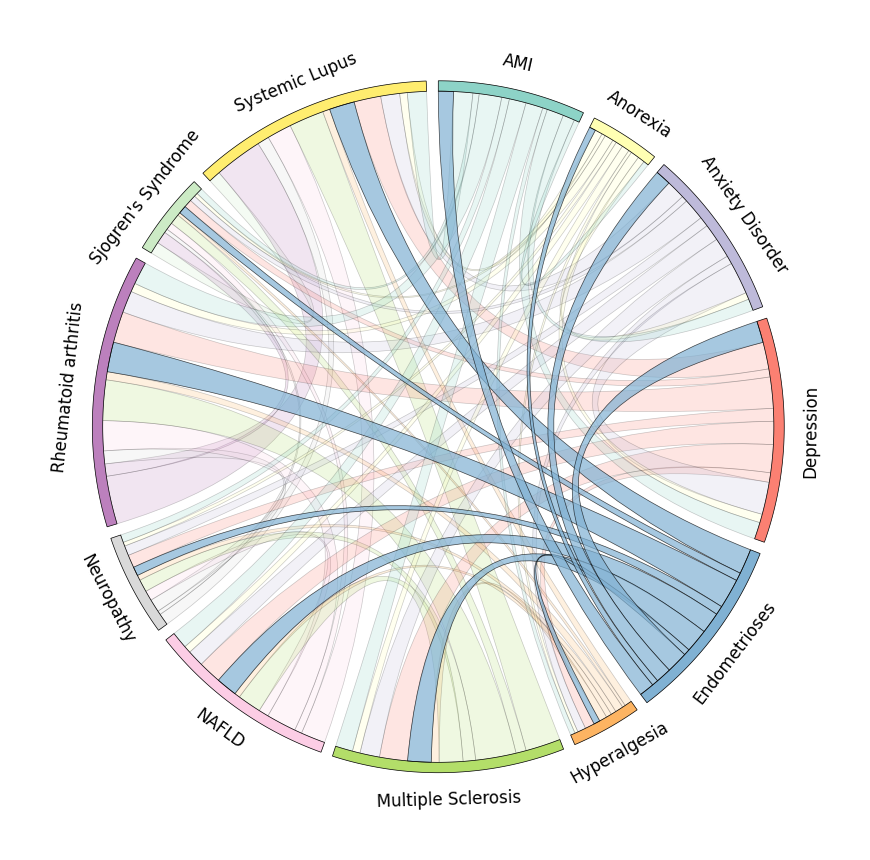

In [4]:
def link_kws_handler(from_label: str, to_label: str):
    if "Endometrioses" in (from_label, to_label):
        # Highlight the links involving Endometrioses
        return dict(alpha=0.7, zorder=1.0 )  # Red color for highlighted links
    else:
        # Dim the links not involving Endometrioses
        return dict(alpha=0.2, zorder=0 )  # Gray color for other links

circos = Circos.chord_diagram(
    matrix_df,
    space=2,
    cmap="Set3",
    label_kws=dict(size=12),
    link_kws=dict(direction=0, ec="black", lw=0.5),
    link_kws_handler=link_kws_handler,  # Apply custom link handler
)

# Plot the figure
fig = circos.plotfig()
circos.savefig("images/circos2.png")

In [5]:
matrix_df

to,AMI,Anorexia,Anxiety Disorder,Depression,Hyperalgesia,Multiple Sclerosis,NAFLD,Neuropathy,Rheumatoid arthritis,Sjogren's Syndrome,Systemic Lupus
from,,,,,,,,,,,
AMI,0,184,414,590,165,607,592,271,792,219,673
Anorexia,0,0,241,298,111,268,252,138,308,127,264
Anxiety Disorder,0,0,0,1134,290,691,579,346,767,207,666
Depression,0,0,0,0,334,982,812,451,1093,283,940
Endometrioses,531,223,550,757,220,824,741,315,1046,282,886
Hyperalgesia,0,0,0,0,0,273,192,182,283,103,253
Multiple Sclerosis,0,0,0,0,0,0,833,439,1420,361,1229
NAFLD,0,0,0,0,0,0,0,352,1053,257,862
Neuropathy,0,0,0,0,0,0,0,0,454,135,414


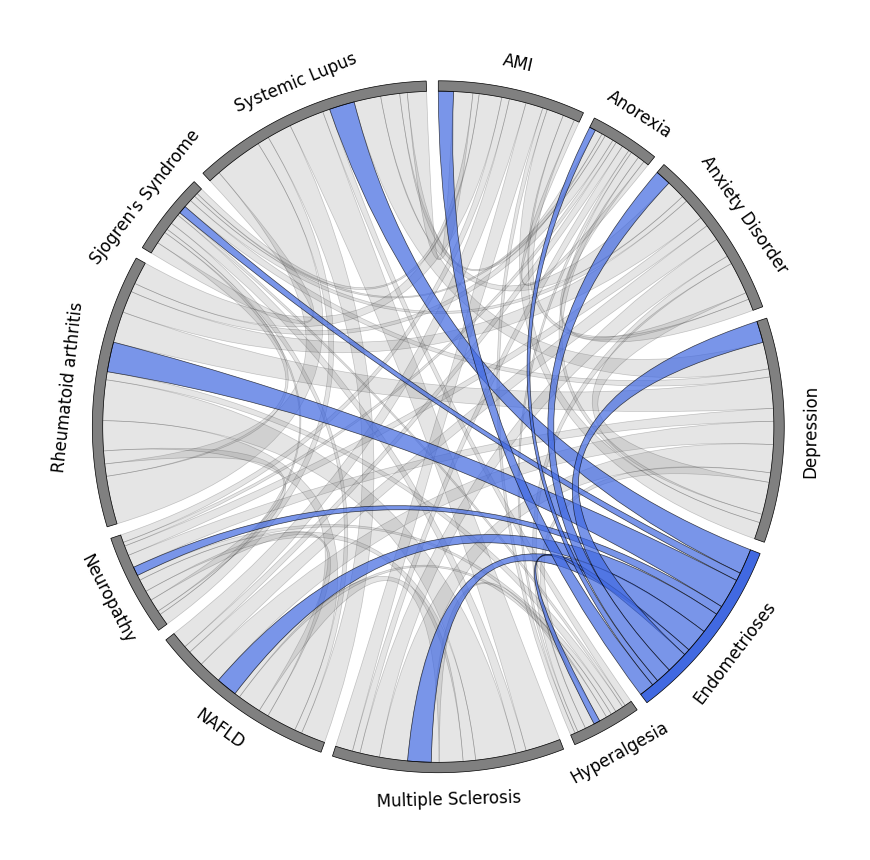

In [6]:
def link_kws_handler(from_label: str, to_label: str):
    if "Endometrioses" in (from_label, to_label):
        # Highlight the links involving Endometrioses
        return dict(alpha=0.7, zorder=1.0 )  # Red color for highlighted links
    else:
        # Dim the links not involving Endometrioses
        return dict(alpha=0.2, zorder=0 )  # Gray color for other links

circos = Circos.chord_diagram(
    matrix_df,
    space=2,
    cmap=dict( Endometrioses="royalblue" ),
    label_kws=dict(size=12),
    link_kws=dict(direction=0, ec="black", lw=0.5),
    link_kws_handler=link_kws_handler,  # Apply custom link handler
)

fig = circos.plotfig()
circos.savefig("images/circos3.png")

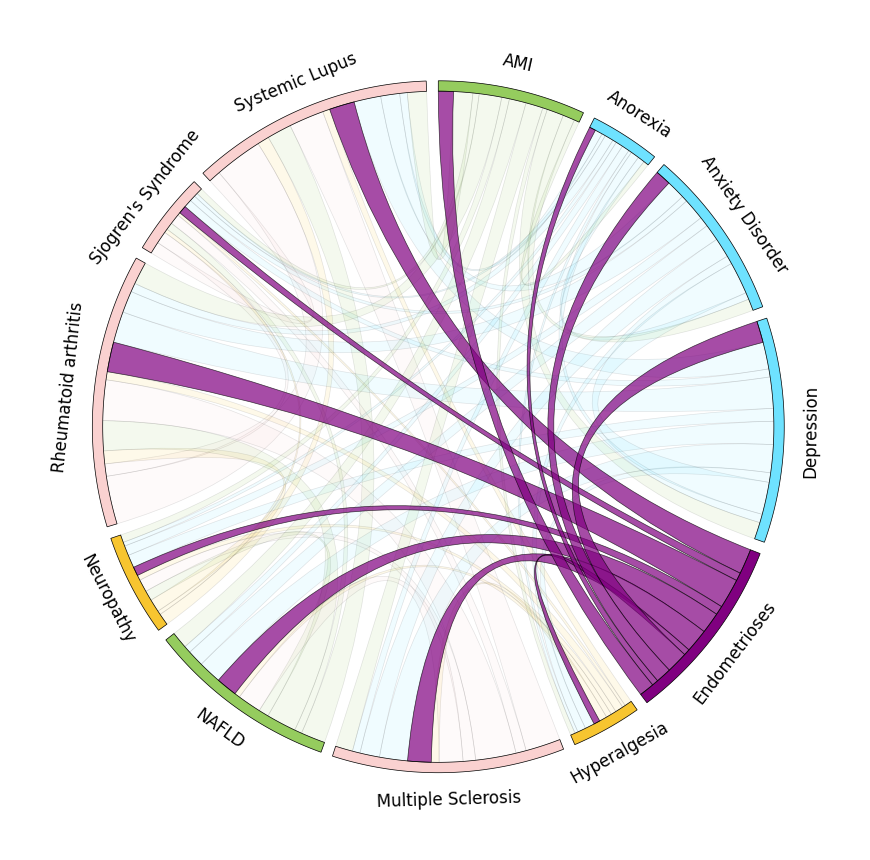

In [13]:
def link_kws_handler(from_label: str, to_label: str):
    if "Endometrioses" in (from_label, to_label):
        # Highlight the links involving Endometrioses
        return dict(alpha=0.7, zorder=1.0 )  # Red color for highlighted links
    else:
        # Dim the links not involving Endometrioses
        return dict(alpha=0.1, zorder=0 )  # Gray color for other links

cmap = [
    ("Endometrioses", "purple"),
    
    # Autoimmune/Inflammatory  
    ("Systemic Lupus", "#fad1d0"),
    ("Rheumatoid arthritis", "#fad1d0"),
    ("Sjogren's Syndrome", "#fad1d0"),
    ("Multiple Sclerosis", "#fad1d0"),
    
    # Mental Health (Light Blue)
    ("Depression", "#6EE2FF"),
    ("Anxiety Disorder", "#6EE2FF"),
    ("Anorexia", "#6EE2FF"),
    
    # Pain/Nerve Related (Yellow)
    ("Neuropathy", "#F7C530"),
    ("Hyperalgesia", "#F7C530"),
    
    # Cardiovascular/Metabolic (Green)
    ("AMI", "#95CC5E"),
    ("NAFLD", "#95CC5E")
]

    
circos = Circos.chord_diagram(
    matrix_df,
    space=2,
    cmap= cmap,
   # link_cmap=[("Endometrioses", "NAFLD", "red")],
    label_kws=dict(size=12),
    link_kws=dict(direction=0, ec="black", lw=0.5),
    link_kws_handler=link_kws_handler,  # Apply custom link handler
)

# Plot the figure
fig = circos.plotfig()
circos.savefig("images/circos4.png")

In [8]:
grouped_diseases = [  "Endometrioses",
  "Rheumatoid arthritis", "Sjogren's Syndrome", "Multiple Sclerosis",
  "Depression", "Anxiety Disorder", "Anorexia",
  "Neuropathy", "Hyperalgesia",
  "AMI", "NAFLD" ]

In [9]:
matrix_df2 = matrix_df.reindex(index=grouped_diseases)
matrix_df2

to,AMI,Anorexia,Anxiety Disorder,Depression,Hyperalgesia,Multiple Sclerosis,NAFLD,Neuropathy,Rheumatoid arthritis,Sjogren's Syndrome,Systemic Lupus
from,,,,,,,,,,,
Endometrioses,531,223,550,757,220,824,741,315,1046,282,886
Rheumatoid arthritis,0,0,0,0,0,0,0,0,0,433,1688
Sjogren's Syndrome,0,0,0,0,0,0,0,0,0,0,423
Multiple Sclerosis,0,0,0,0,0,0,833,439,1420,361,1229
Depression,0,0,0,0,334,982,812,451,1093,283,940
Anxiety Disorder,0,0,0,1134,290,691,579,346,767,207,666
Anorexia,0,0,241,298,111,268,252,138,308,127,264
Neuropathy,0,0,0,0,0,0,0,0,454,135,414
Hyperalgesia,0,0,0,0,0,273,192,182,283,103,253


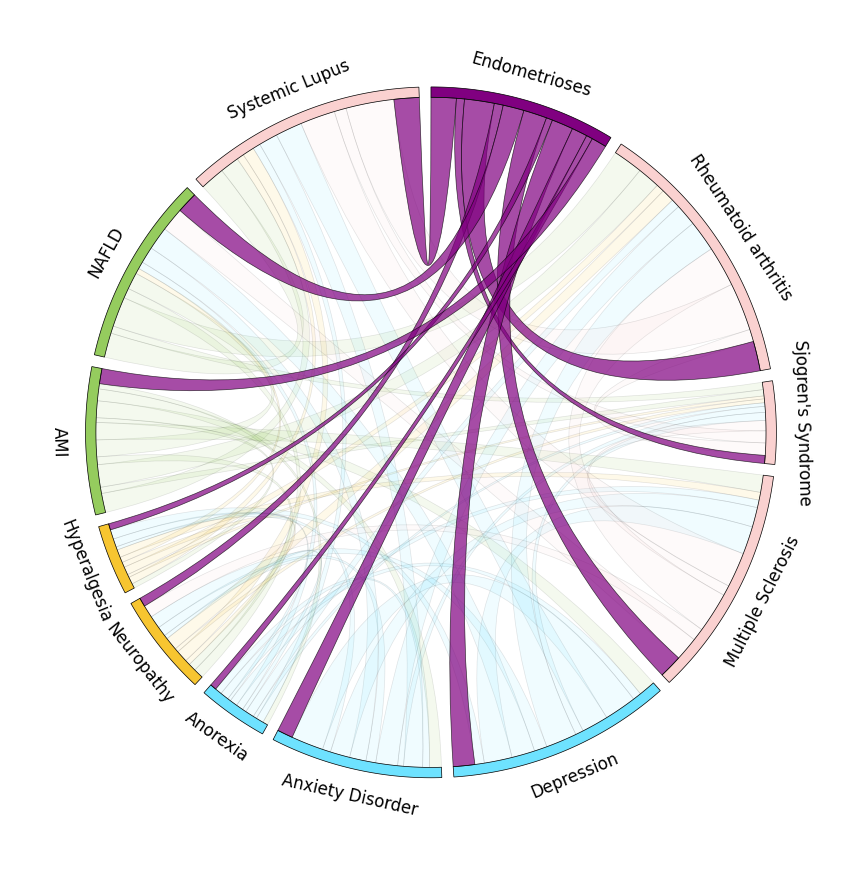

In [12]:
# Initialize Circos instance for chord diagram plot
circos = Circos.chord_diagram(
    matrix_df2,
    space=2,
    cmap= cmap,
    label_kws=dict(size=12),
    link_kws=dict(direction=0, ec="black", lw=0.5),
    link_kws_handler=link_kws_handler,  # Apply custom link handler
)

fig = circos.plotfig()
circos.savefig("images/circos5.png")

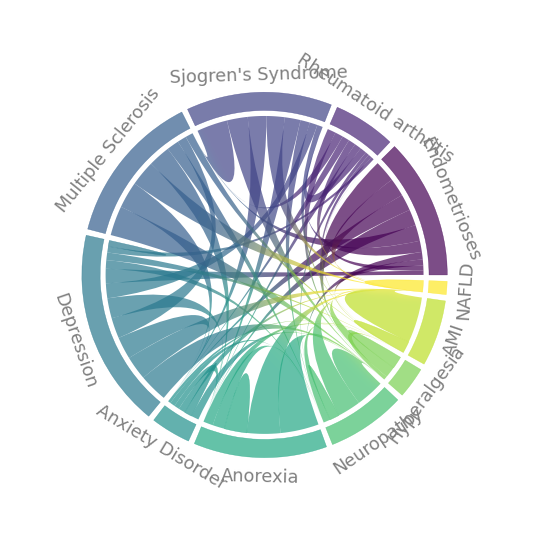

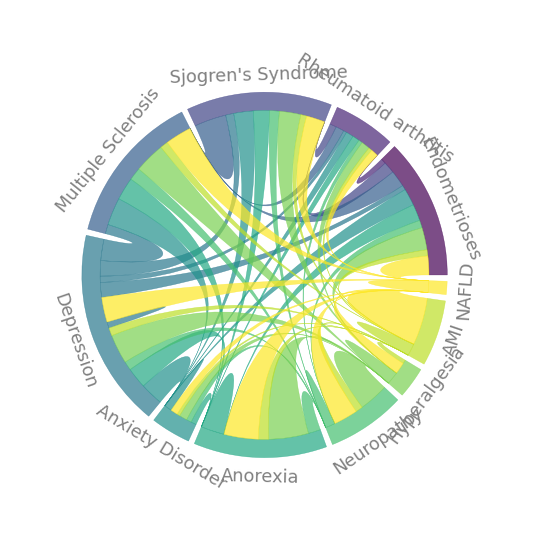

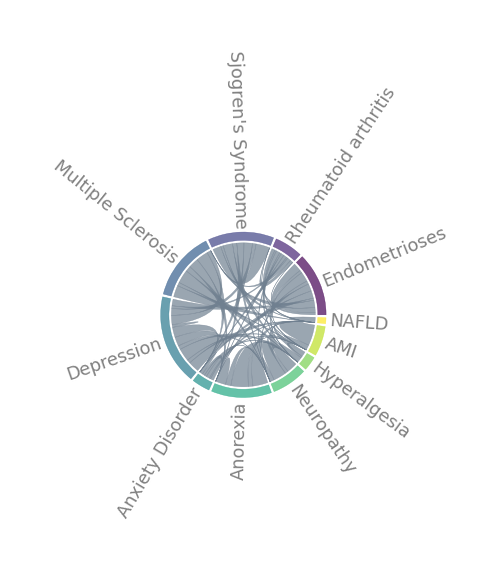

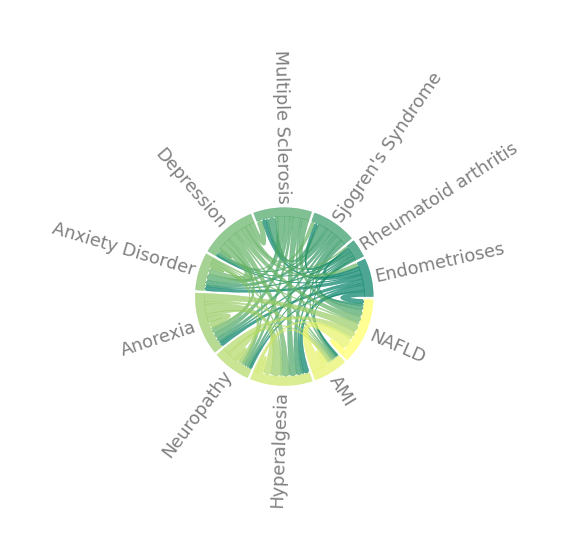

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_chord_diagram import chord_diagram



# plot different examples

grads = (True, False, False, False)               # gradient
gaps  = (0.03, 0, 0.03, 0)                        # gap value
sorts = ("size", "distance", None, "distance")    # sort type
cclrs = (None, None, "slategrey", None)           # chord colors
nrota = (False, False, True, True)                # name rotation
cmaps = (None, None, None, "summer")              # colormap
fclrs = "grey"                                    # fontcolors
drctd = (False, False, False, True)               # directed

args = (grads, gaps, sorts, cclrs, nrota, cmaps, drctd)

for grd, gap, srt, cc, nr, cm, d in zip(*args):
    chord_diagram(matrix_df, grouped_diseases, gap=gap, use_gradient=grd, sort=srt, directed=d,
                  cmap=cm, chord_colors=cc, rotate_names=nr, fontcolor=fclrs)

    str_grd = "_gradient" if grd else ""

    

plt.show()
